In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as mn

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer

from sklearn import set_config
set_config(display='diagram')

#Nate shared this list as his ultimate go-to during our regresssion hack-a-thon

In [56]:
df_ames_train = pd.read_csv('./datasets/train.csv')

I know I need to split my data into train/test before I do any data transformations and build any models.

In [57]:
df_ames_reg_train = df_ames_train[['Neighborhood',
'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF',
'Year Built', 'Year Remod/Add','SalePrice']]

In [58]:
df_ames_reg_train.shape

(2051, 8)

In [59]:
df_ames_reg_train.isna().sum()

Neighborhood      0
Gr Liv Area       0
Garage Cars       1
Total Bsmt SF     1
1st Flr SF        0
Year Built        0
Year Remod/Add    0
SalePrice         0
dtype: int64

In [60]:
df_ames_reg_train.dropna(inplace=True)

C:\Users\sarah\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [61]:
df_ames_reg_train.isna().sum()

Neighborhood      0
Gr Liv Area       0
Garage Cars       0
Total Bsmt SF     0
1st Flr SF        0
Year Built        0
Year Remod/Add    0
SalePrice         0
dtype: int64

In [62]:

X = df_ames_reg_train[['Neighborhood',
'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF',
'Year Built', 'Year Remod/Add']]
y = df_ames_reg_train['SalePrice']
    

I checked some other Linear Regression models before I settled on this one.  I looked at only using Overall Qual and Neighborhood as categorical variables, and that model didn't perform as well as this one.  I dropped the Overall Quality feature because when I coded it as a categorical variable, the levels didn't line up in importance in the model as I expected.  I also dropped the Full Bath because it showed up with a negative coefficient in my Linear Regression Model, and that didn't make sense to me either.  As I was cleaning up these code notebooks, I realized that the Full Bath feature was very highly correlated with Gr Liv Area, so the multicollinearity was throwing off the Full Bath coefficient.

In [63]:
X.shape

(2049, 7)

In [64]:
y.shape

(2049,)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [66]:
X_train.dtypes

Neighborhood       object
Gr Liv Area         int64
Garage Cars       float64
Total Bsmt SF     float64
1st Flr SF          int64
Year Built          int64
Year Remod/Add      int64
dtype: object

In [67]:
ct1 = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['Neighborhood']),
    remainder='passthrough',
     verbose_feature_names_out=False)


In [68]:
pipe3 = make_pipeline(ct1, StandardScaler(with_mean=False), LinearRegression())

In [69]:
LinearRegression().get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [70]:
pipe3.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Neighborhood'])],
                                   verbose_feature_names_out=False)),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [71]:
preds= pipe3.predict(X_test)

In [72]:
pipe3.named_steps

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore'),
                                  ['Neighborhood'])],
                   verbose_feature_names_out=False),
 'standardscaler': StandardScaler(with_mean=False),
 'linearregression': LinearRegression()}

In [73]:
cols_p3 = pipe3.named_steps.get('columntransformer').get_feature_names_out()
cols_p3

array(['Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Greens',
       'Neighborhood_GrnHill', 'Neighborhood_IDOTRR',
       'Neighborhood_Landmrk', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Gr Liv Area',
       'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Year Built',
       'Year Remod/Add'], dtype=object)

In [74]:
pipe3.named_steps['linearregression'].coef_

array([-1268.86868318,  -958.76128441, -1695.58818716,    86.10737997,
        1867.9332718 , -1450.11094658,  4686.53545351, -4674.46175123,
       -2816.47256689,   754.82031122,  3966.27469207, -2820.34789911,
        -812.51171075, -3065.47479696, -3367.16787153, -3241.6119298 ,
       -1691.08748215, -2665.92169552,  6431.09368635, 14728.83896873,
       -3333.39107098,  -864.71010445, -2567.17643102, -2810.40207077,
        2071.44079464,  9102.73000219,  2206.96197625,  3574.35358353,
       26972.35242925, 11701.59536757, 13063.53280479,  5134.52467498,
       11120.67199306,  9436.47226249])

In [75]:
df_simpl_reg = pd.DataFrame(zip(cols_p3, 
pipe3.named_steps['linearregression'].coef_))
df_simpl_reg

,0,1
0,Neighborhood_Blmngtn,-1268.868683
1,Neighborhood_Blueste,-958.761284
2,Neighborhood_BrDale,-1695.588187
3,Neighborhood_BrkSide,86.107380
4,Neighborhood_ClearCr,1867.933272
5,Neighborhood_CollgCr,-1450.110947
6,Neighborhood_Crawfor,4686.535454
7,Neighborhood_Edwards,-4674.461751
8,Neighborhood_Gilbert,-2816.472567
9,Neighborhood_Greens,754.820311


In [76]:
df_simpl_reg.to_csv('./datasets/simplereg.csv', index = False)

In [77]:
residuals = preds - y_test
residuals

1867    -4676.665051
1852   -23126.699251
117    -58360.627821
1853   -11277.669960
255     43099.897821
            ...     
1195      486.988926
1397    -6141.142504
97       5396.226791
925     49172.226504
1448    59090.590493
Name: SalePrice, Length: 513, dtype: float64

In [78]:
#Evaluate my metrics
print('Linear Regression Model #3 w/Categorical Vars, No Full Bath & More: MAE:', mean_absolute_error(y_test, preds))
print('Linear Regression Model #3 w/Categorical Vars, No Full Bath & More: MSE:', mean_squared_error(y_test, preds))
print('Linear Model #3 w/Categorical Vars, No Full Bath & More: R2:', r2_score(y_test, preds))

Linear Regression Model #3 w/Categorical Vars, No Full Bath & More: MAE: 24584.452792899876
Linear Regression Model #3 w/Categorical Vars, No Full Bath & More: MSE: 1444350015.673796
Linear Model #3 w/Categorical Vars, No Full Bath & More: R2: 0.7553615780656442


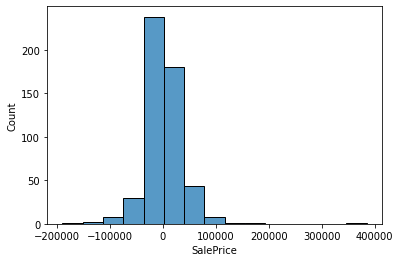

In [79]:
sns.histplot(residuals, bins=15);
#This looks like a normal distribution so this doesn't look too bad.

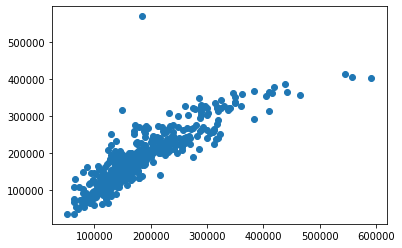

In [80]:
plt.scatter(y_test, preds);
#This doesn't look too bad!

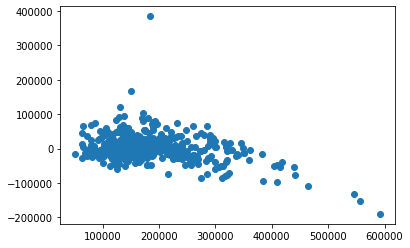

In [81]:
plt.scatter(y_test, residuals);
